In [375]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [377]:
df = pd.read_csv('../input/wine-quality/winequalityN.csv')

df.shape

(6497, 13)

In [378]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [380]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [381]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [382]:
df.skew()

fixed acidity           1.722805
volatile acidity        1.495512
citric acid             0.473032
residual sugar          1.435000
chlorides               5.399849
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [383]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [384]:
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].mean())
df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].mean())
df['citric acid'] = df['citric acid'].fillna(df['citric acid'].mode()[0])
df['residual sugar'] = df['residual sugar'].fillna(df['residual sugar'].mode()[0])
df['chlorides'] = df['chlorides'].fillna(df['chlorides'].mean())
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['sulphates'] = df['sulphates'].fillna(df['sulphates'].mean())

In [385]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

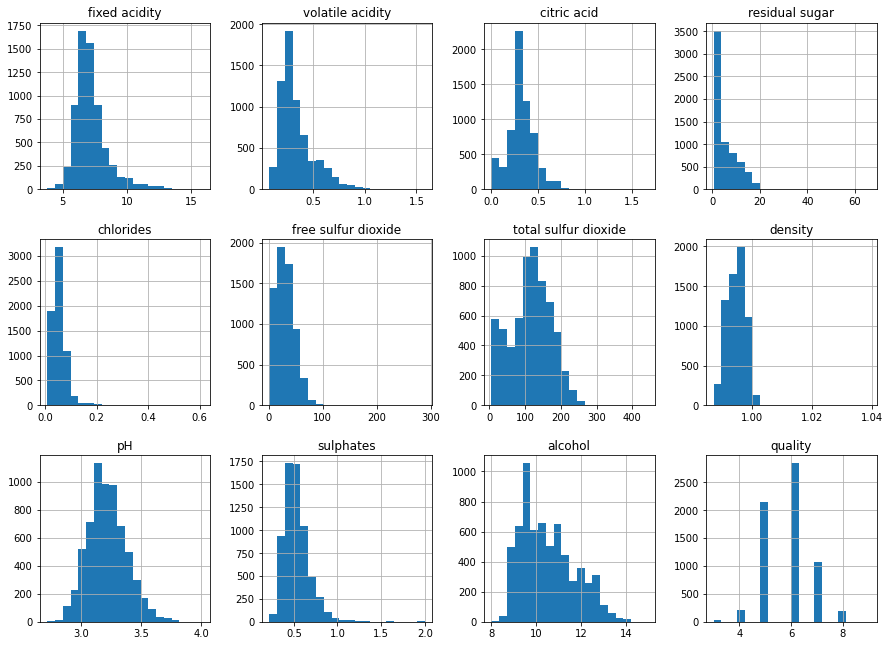

In [386]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

fixed acidity              AxesSubplot(0.125,0.749828;0.133621x0.130172)
volatile acidity        AxesSubplot(0.285345,0.749828;0.133621x0.130172)
citric acid              AxesSubplot(0.44569,0.749828;0.133621x0.130172)
residual sugar          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
chlorides               AxesSubplot(0.766379,0.749828;0.133621x0.130172)
free sulfur dioxide        AxesSubplot(0.125,0.593621;0.133621x0.130172)
total sulfur dioxide    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
density                  AxesSubplot(0.44569,0.593621;0.133621x0.130172)
pH                      AxesSubplot(0.606034,0.593621;0.133621x0.130172)
sulphates               AxesSubplot(0.766379,0.593621;0.133621x0.130172)
alcohol                    AxesSubplot(0.125,0.437414;0.133621x0.130172)
quality                 AxesSubplot(0.285345,0.437414;0.133621x0.130172)
dtype: object

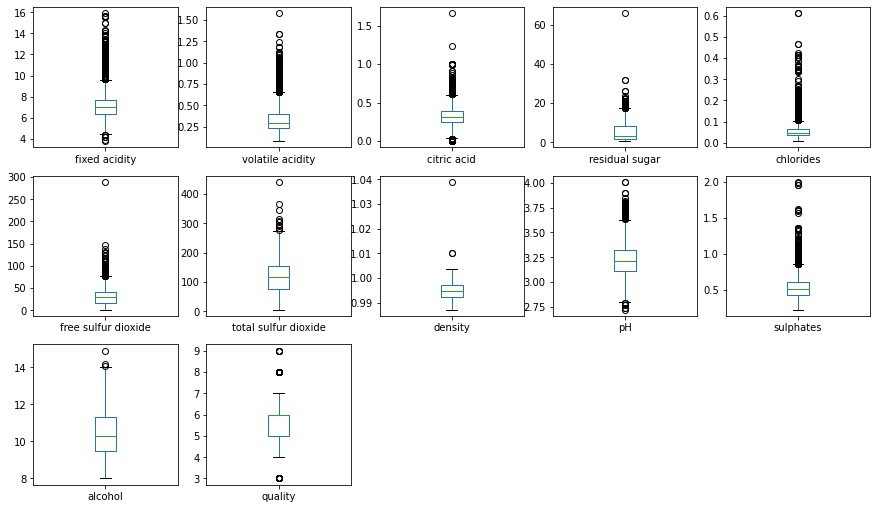

In [387]:
#checking outliers using box plot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

**Observation** from histogram and box plot

1. “fixed.acidity” is a measure of inside liquid concentration. 
    The histogram a right-skewed distributed with some outliers located at right side. 
    The most frequent values are between 7-8.
2. “volatile.acidity” is measure of acidity above-surface of liquid. 
    The histogram is right-skewed distributed with some outliers located at right side.
    The most frequent values are between 0.4-0.6.
3. “citric.acid” is right-skewed distributed with some outliers located at very right side. 
    The most frequent values 0. It’s also interesting a lot of wine have citric.acid = 0
4. “residual.sugar” is right-skewed distributed
5. “chlorides” is right-skewed distributed 
    The most frequent values are between 0.05-0.1
6. “free.sulfur.dioxide” is right-skewed distributed
7. “sulphates” is a right-skewed distributed

In [388]:
df.loc[df['citric acid']>1.1,'citric acid'] = np.mean(df["citric acid"])
df.loc[df['residual sugar']>60,'residual sugar'] = np.mean(df["residual sugar"])
df.loc[df['chlorides']>5.5,'chlorides'] = np.mean(df["chlorides"])
df.loc[df['free sulfur dioxide']>250,'free sulfur dioxide'] = np.mean(df["free sulfur dioxide"])
df.loc[df['total sulfur dioxide']>330,'total sulfur dioxide'] = np.mean(df["total sulfur dioxide"])
df.loc[df['density']>1.01,'density'] = np.mean(df["density"])

<AxesSubplot:>

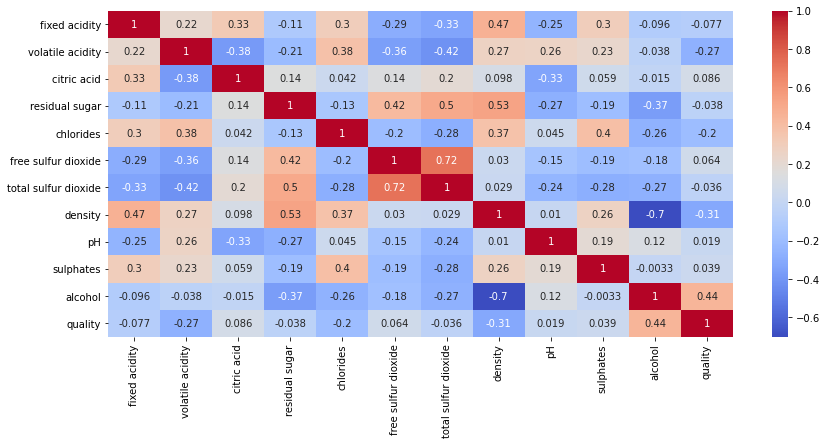

In [389]:
plt.figure(figsize=[14,6])
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')

**Observation**

1. total sulfur dioxide is highly correlated with free sulfur dioxide
2. fixed acidity is highly correlated with density and citric acid
3. alcohol is highly correlated with quality
4. citric acid is inversely correlated with pH and volatile acidity

<AxesSubplot:xlabel='quality', ylabel='count'>

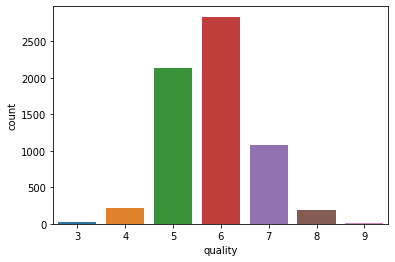

In [390]:
sns.countplot(x='quality', data=df)

In [391]:
#get_dummies() function which is used for handling categorical columns, 
#in this dataset ‘Type’ feature contains two types Red and White,
#where Red consider as 0 and white considers as 1
df = pd.get_dummies(df,drop_first=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0


In [392]:
# as we can see from the above table some wine quality of 6 and 5 is white and some as red
# considering the best quality value of wine is 7
df['Excellent quality'] = [ 1 if x>=7 else 0 for x in df.quality] 
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white,Excellent quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0,0


In [393]:
y = df['Excellent quality']
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: Excellent quality, Length: 6497, dtype: int64

In [394]:
y.value_counts()

0    5220
1    1277
Name: Excellent quality, dtype: int64

In [395]:
x = df.drop(['quality','Excellent quality'], axis =1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


In [396]:
from imblearn.combine import SMOTEENN
sn = SMOTEENN(random_state=0)
sn.fit(x,y)
x,y=sn.fit_resample(x,y)

In [397]:
y.value_counts()

1    4535
0    3367
Name: Excellent quality, dtype: int64

In [398]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [399]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score of KNN:",accuracy_score(y_test,y_pred1))



Accuracy Score of KNN: 0.9772296015180265


In [400]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

print("Accuracy Score of SVC:",accuracy_score(y_test,y_pred2))

Accuracy Score of SVC: 0.7526881720430108


In [401]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

print("Accuracy Score of decission tree:",accuracy_score(y_test,y_pred3))

Accuracy Score of decission tree: 0.9253636938646427


In [402]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(random_state=1)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)


print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.9576217583807717


In [403]:
submission = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_pred1})
submission.to_csv('wine_quality.csv',index = False)